<a href="https://colab.research.google.com/github/JoshAmpofo/python/blob/main/gam_hadr_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description
This dataset was retrieved from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope). It details telescopic images of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. The task is to take the various parameters of the telescope readings and predict whether the detected particle is a **gamma** or **hadron** particle.

**Attributes**

* fLength: major axis of ellipse [mm]
* fWidth: minor axis of ellipse [mm]
* fSize: 10-log of sum of content of all pixels [in #phot]
* fConc: ratio of sum of two highest pixels over fSize  [ratio]
* fConc1: ratio of highest pixel over fSize  [ratio]
* fAsym: distance from highest pixel to center, projected onto major axis [mm]
* fM3Long: 3rd root of third moment along major axis  [mm]
* fM3Trans: 3rd root of third moment along minor axis  [mm]
* fAlpha: angle of major axis with vector to origin [deg]
* fDist: distance from origin to center of ellipse [mm]
* class: gamma (signal), hadron (background)





# Load libraries and Dataset

In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# mount drive to access documents
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load the dataset
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
             'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
telescope = pd.read_csv('/content/drive/MyDrive/Colab_Datasets/MAGIC_telescope/magic04.data',
                        names=col_names)
telescope

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
# check shape
telescope.shape

(19020, 11)

In [5]:
# check datatypes of dataset
telescope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [6]:
# check for null values
telescope.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [7]:
# check quantitative summary of dataset
telescope.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


<Figure size 1000x800 with 0 Axes>

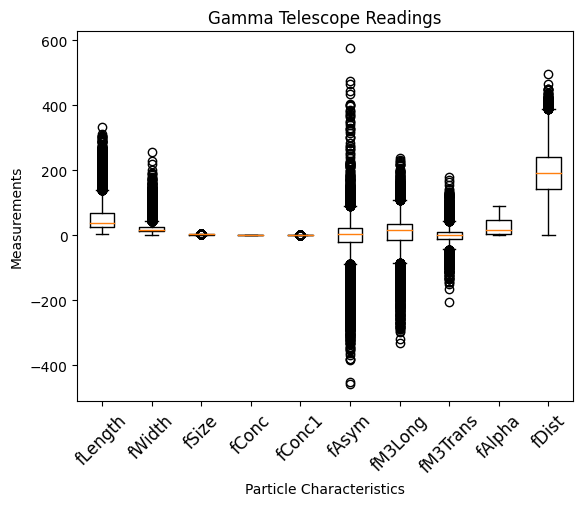

In [8]:
# boxplot to visualize outliers in numerical columns
plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']

ax.boxplot(telescope[col_names].values)
ax.set_xticklabels(col_names, rotation=45, fontsize=12)
ax.set_ylabel('Measurements')
ax.set_xlabel('Particle Characteristics')
ax.set_title('Gamma Telescope Readings')
plt.show()

# Transformations and Normalizations

In [9]:
from sklearn.preprocessing import MinMaxScaler
cols = ['fLength', 'fWidth', 'fSize', 'fConc1', 'fAsym', 'fM3Long', 'fAlpha',
        'fM3Trans', 'fDist']

# Instantiate the scaler
mmx_scaler = MinMaxScaler()

# Fit the scaler
telescope['scaled_fLength'] = mmx_scaler.fit_transform(telescope['fLength'].values.reshape(-1, 1))
telescope['scaled_fWidth'] = mmx_scaler.fit_transform(telescope['fWidth'].values.reshape(-1, 1))
telescope['scaled_fSize'] = mmx_scaler.fit_transform(telescope['fSize'].values.reshape(-1, 1))
telescope['scaled_fConc1'] = mmx_scaler.fit_transform(telescope['fConc1'].values.reshape(-1, 1))
telescope['scaled_fAsym'] = mmx_scaler.fit_transform(telescope['fAsym'].values.reshape(-1, 1))
telescope['scaled_fM3Long'] = mmx_scaler.fit_transform(telescope['fM3Long'].values.reshape(-1, 1))
telescope['scaled_fM3Trans'] = mmx_scaler.fit_transform(telescope['fM3Trans'].values.reshape(-1, 1))
telescope['scaled_fDist'] = mmx_scaler.fit_transform(telescope['fDist'].values.reshape(-1, 1))

# drop old columns
telescope = telescope.drop(telescope[cols], axis=1)


# view dataset
telescope

,fConc,class,scaled_fLength,scaled_fWidth,scaled_fSize,scaled_fConc1,scaled_fAsym,scaled_fM3Long,scaled_fM3Trans,scaled_fDist
0,0.3918,g,0.074306,0.062415,0.208043,0.293229,0.470032,0.620576,0.512493,0.163066
1,0.5303,g,0.082815,0.045727,0.170668,0.558601,0.468649,0.623756,0.507944,0.412679
2,0.0374,g,0.478241,0.530579,0.626818,0.027263,0.556215,0.468201,0.416540,0.516926
3,0.6147,g,0.059212,0.037338,0.117445,0.580679,0.469558,0.570630,0.515219,0.233582
4,0.3168,g,0.214774,0.120603,0.360674,0.271003,0.437870,0.632050,0.590373,0.718582
...,...,...,...,...,...,...,...,...,...,...
19015,0.5857,h,0.051838,0.042581,0.199527,0.582457,0.457992,0.602182,0.541215,0.213530
19016,0.5351,h,0.074757,0.026141,0.096363,0.412061,0.479112,0.605095,0.526076,0.498046
19017,0.1417,h,0.215712,0.185389,0.445594,0.080901,0.434164,0.653983,0.509218,0.516377
19018,0.0944,h,0.352326,0.299950,0.606919,0.100756,0.448838,0.417922,0.368263,0.823491


In [10]:
telescope.describe()

,fConc,scaled_fLength,scaled_fWidth,scaled_fSize,scaled_fConc1,scaled_fAsym,scaled_fM3Long,scaled_fM3Trans,scaled_fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,0.380327,0.148432,0.086515,0.261300,0.317613,0.439028,0.600465,0.534405,0.389528
std,0.182813,0.128420,0.071558,0.139739,0.163744,0.057306,0.089458,0.053993,0.151194
min,0.013100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235800,0.060785,0.046274,0.158427,0.189917,0.423294,0.559440,0.505632,0.285688
50%,0.354150,0.099621,0.066853,0.236044,0.290710,0.447105,0.608829,0.535485,0.385550
75%,0.503700,0.199576,0.096495,0.343081,0.422174,0.466512,0.644829,0.562135,0.484102
max,0.893000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


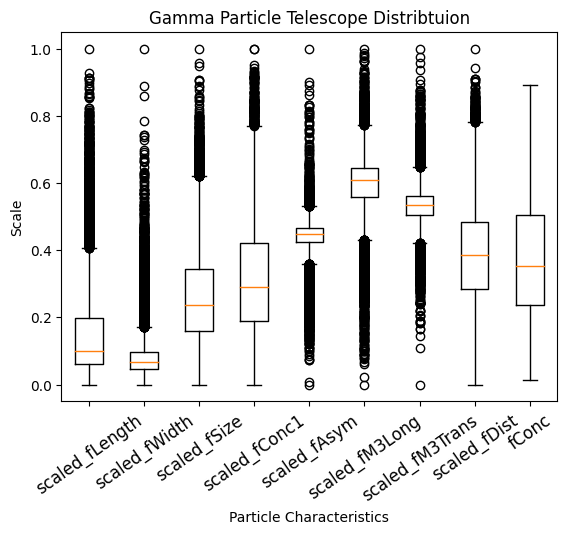

<Figure size 1000x800 with 0 Axes>

In [11]:
# boxplot
new_cols = ['scaled_fLength',	'scaled_fWidth',	'scaled_fSize',	'scaled_fConc1',
            'scaled_fAsym',	'scaled_fM3Long',	'scaled_fM3Trans',
            'scaled_fDist', 'fConc']
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))

ax.boxplot(telescope[new_cols].values)
ax.set_xticklabels(new_cols, rotation=35, fontsize=12)
ax.set_xlabel('Particle Characteristics')
ax.set_ylabel('Scale')
ax.set_title('Gamma Particle Telescope Distribtuion')

plt.show()

# Visualizations

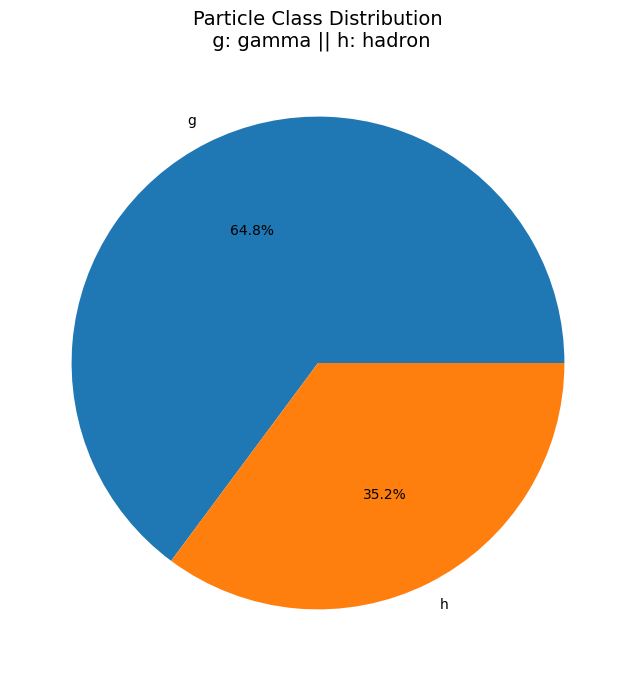

In [12]:
# plot class distribution
class_counts = telescope['class'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Particle Class Distribution\n g: gamma || h: hadron', fontsize=14)
plt.show()

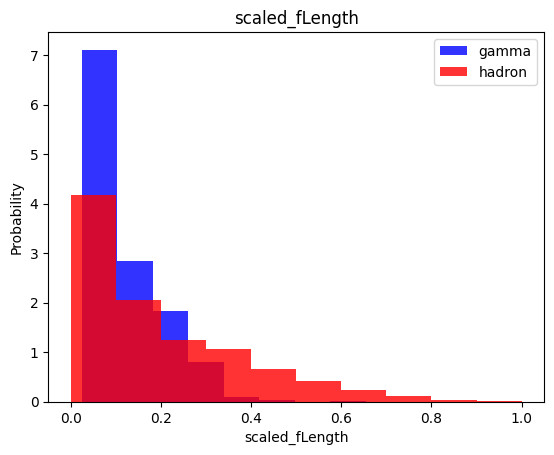

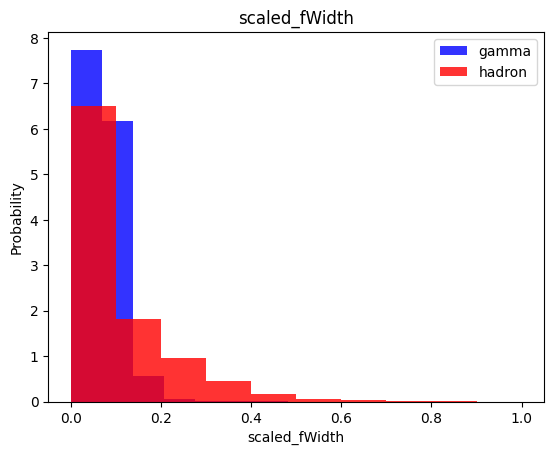

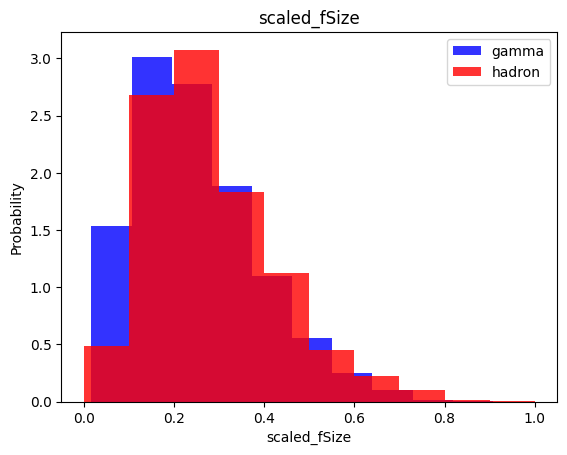

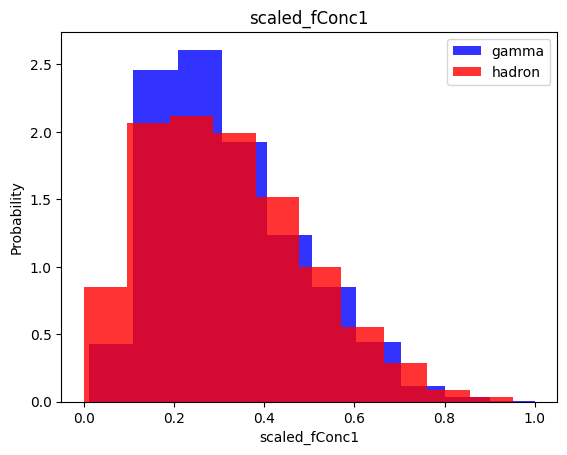

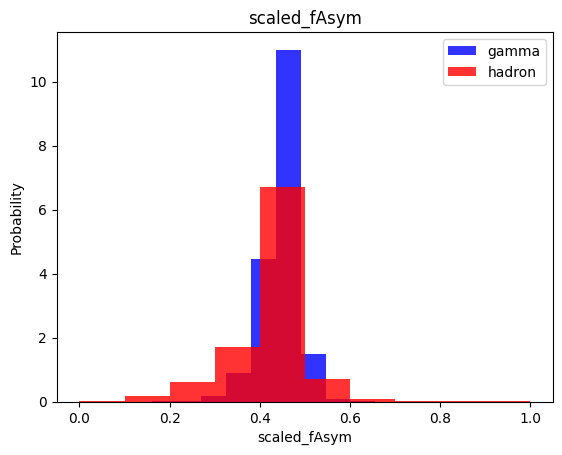

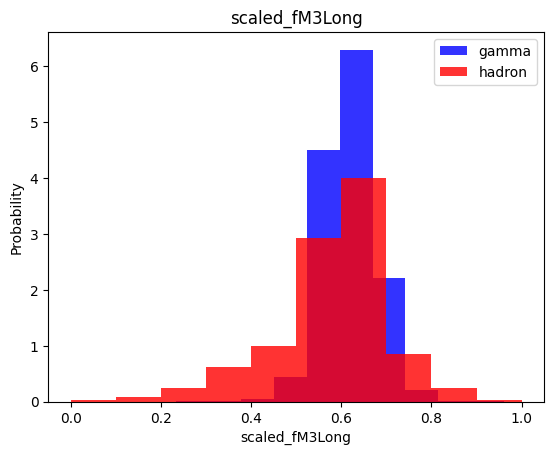

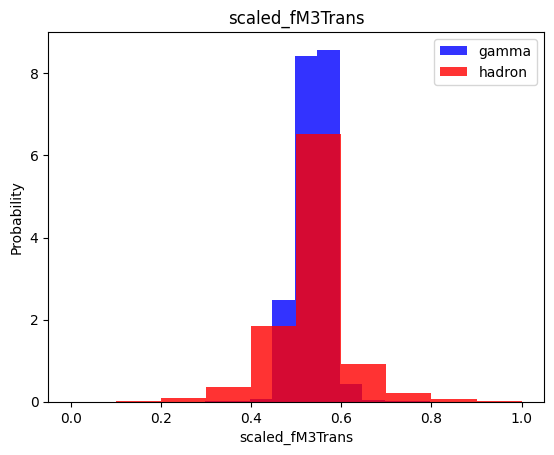

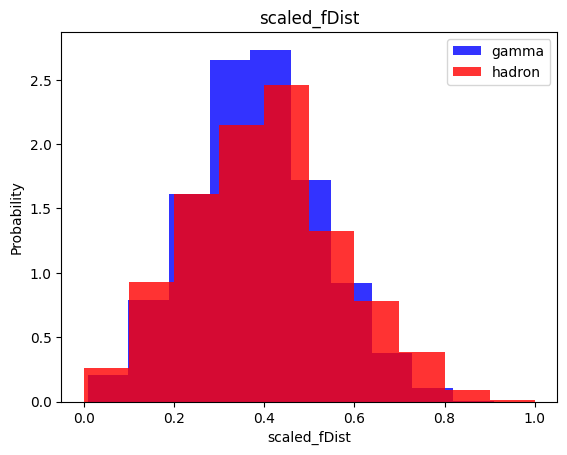

In [13]:
# plot histogram distribution relationships between class and features
for label in new_cols[:-1]:
  plt.hist(telescope[telescope['class']=='g'][label], label='gamma',
           color='blue', alpha=0.8, density=True)
  plt.hist(telescope[telescope['class']=='h'][label], label='hadron',
           color='red', alpha=0.8, density=True)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.title(label)
  plt.legend()

  plt.show()

<ipython-input-14-a902ffbb02a2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(telescope.corr(), cmap='viridis', annot=True)


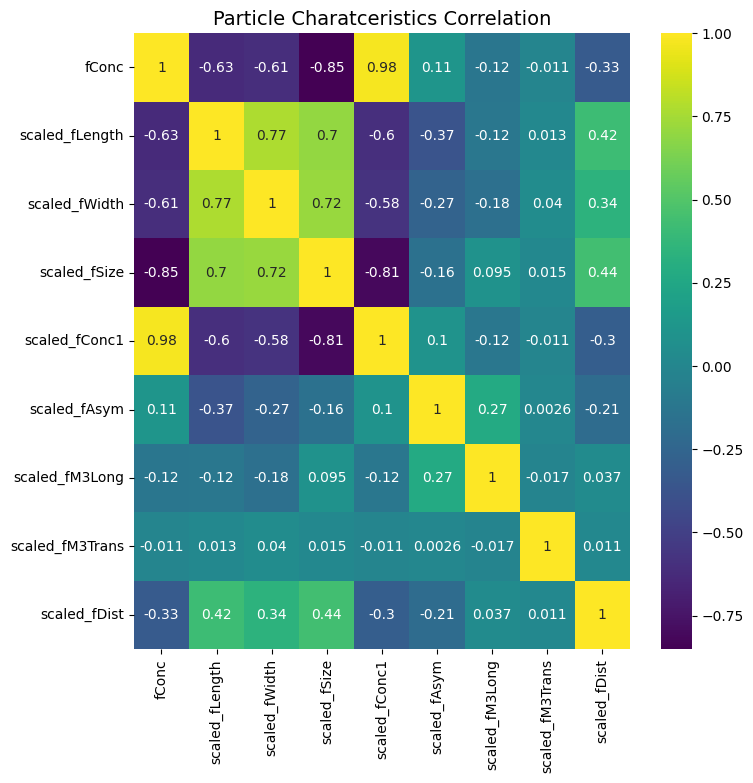

In [14]:
# investigating correlation among particle features
plt.figure(figsize=(8,8))

sns.heatmap(telescope.corr(), cmap='viridis', annot=True)
plt.title('Particle Charatceristics Correlation', fontsize=14)
plt.show()

<Figure size 800x800 with 0 Axes>

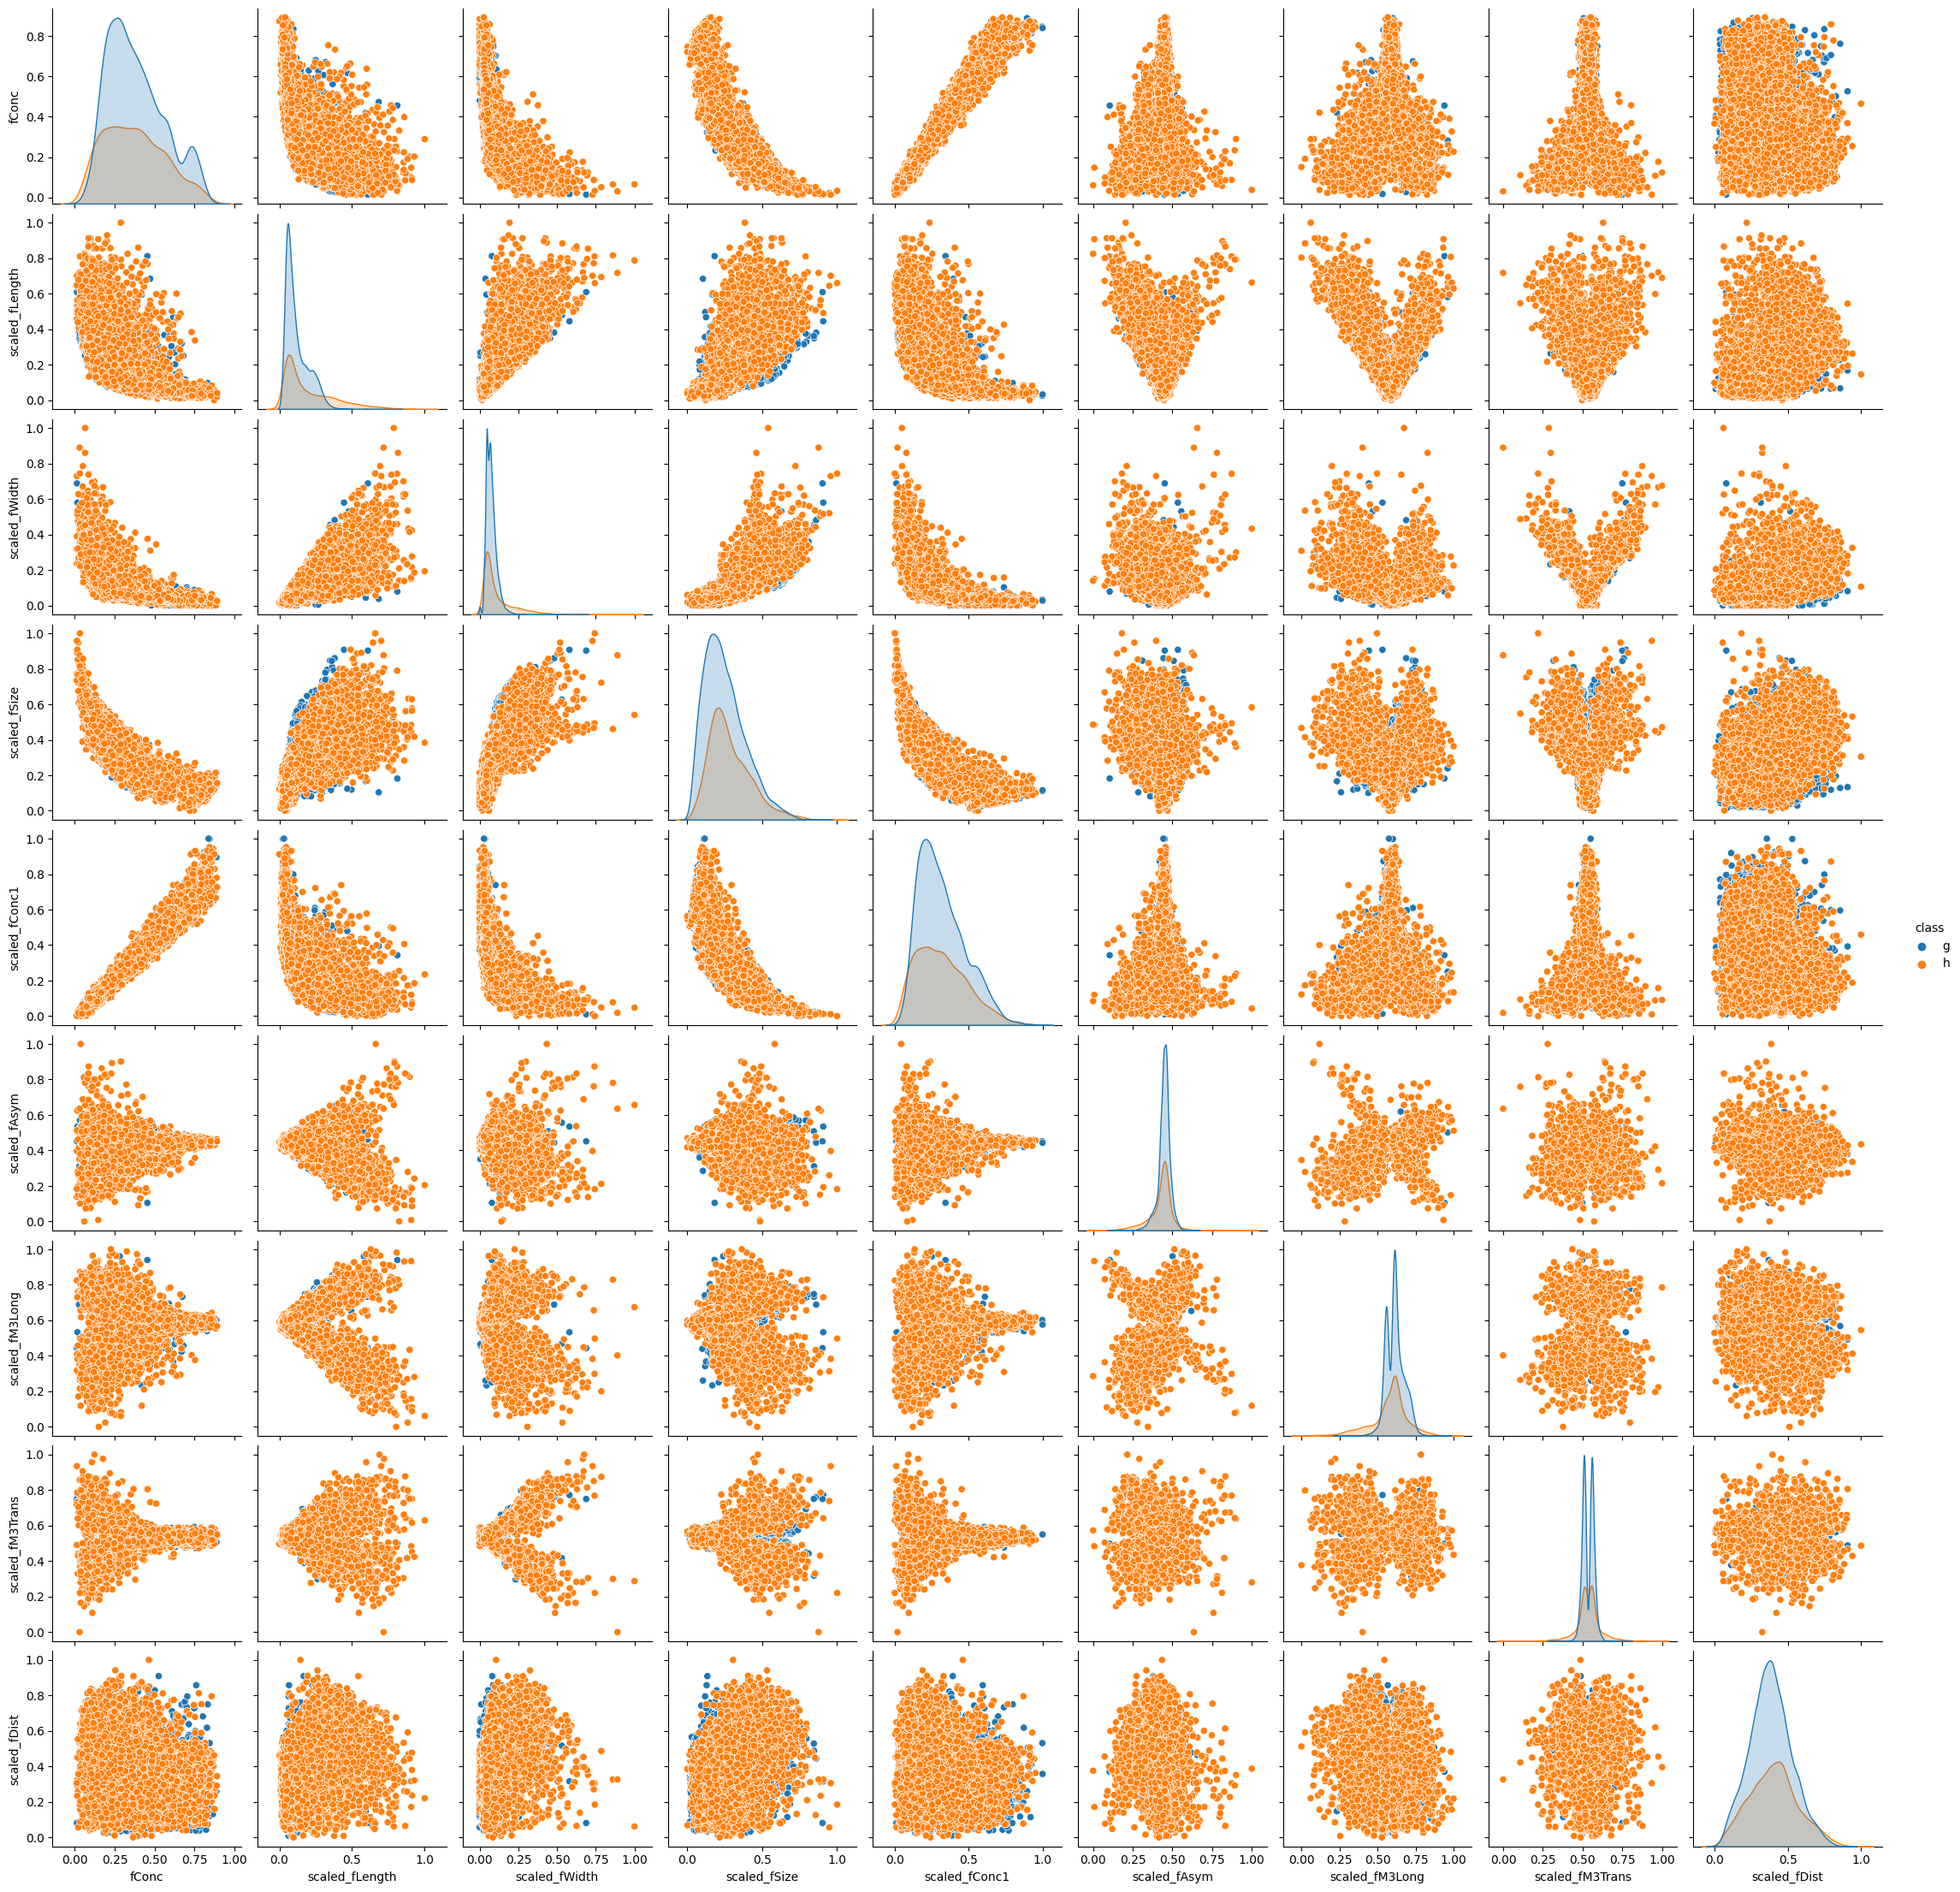

In [15]:
# plot pairplot distribution
plt.figure(figsize=(8,8))

sns.pairplot(telescope, hue='class')
plt.show()

In [16]:
#reorder class column

# Identify column to move and its current position
column_to_move = 'class'
current_position = telescope.columns.get_loc(column_to_move)

# Create list of column names in desired order
desired_order = list(telescope.columns)
desired_order.insert(11, desired_order.pop(current_position))

# Reorder columns in DataFrame
telescope_reordered = telescope[desired_order]

# reassign modified DataFrame to original variable
telescope = telescope_reordered

# view reordered dataframe
telescope

,fConc,scaled_fLength,scaled_fWidth,scaled_fSize,scaled_fConc1,scaled_fAsym,scaled_fM3Long,scaled_fM3Trans,scaled_fDist,class
0,0.3918,0.074306,0.062415,0.208043,0.293229,0.470032,0.620576,0.512493,0.163066,g
1,0.5303,0.082815,0.045727,0.170668,0.558601,0.468649,0.623756,0.507944,0.412679,g
2,0.0374,0.478241,0.530579,0.626818,0.027263,0.556215,0.468201,0.416540,0.516926,g
3,0.6147,0.059212,0.037338,0.117445,0.580679,0.469558,0.570630,0.515219,0.233582,g
4,0.3168,0.214774,0.120603,0.360674,0.271003,0.437870,0.632050,0.590373,0.718582,g
...,...,...,...,...,...,...,...,...,...,...
19015,0.5857,0.051838,0.042581,0.199527,0.582457,0.457992,0.602182,0.541215,0.213530,h
19016,0.5351,0.074757,0.026141,0.096363,0.412061,0.479112,0.605095,0.526076,0.498046,h
19017,0.1417,0.215712,0.185389,0.445594,0.080901,0.434164,0.653983,0.509218,0.516377,h
19018,0.0944,0.352326,0.299950,0.606919,0.100756,0.448838,0.417922,0.368263,0.823491,h


# Model

In [17]:
# convert class column to numerical
telescope['class'] = (telescope['class'] == 'g').astype(int) # if true make g=1

In [18]:
# view transformed class
telescope

,fConc,scaled_fLength,scaled_fWidth,scaled_fSize,scaled_fConc1,scaled_fAsym,scaled_fM3Long,scaled_fM3Trans,scaled_fDist,class
0,0.3918,0.074306,0.062415,0.208043,0.293229,0.470032,0.620576,0.512493,0.163066,1
1,0.5303,0.082815,0.045727,0.170668,0.558601,0.468649,0.623756,0.507944,0.412679,1
2,0.0374,0.478241,0.530579,0.626818,0.027263,0.556215,0.468201,0.416540,0.516926,1
3,0.6147,0.059212,0.037338,0.117445,0.580679,0.469558,0.570630,0.515219,0.233582,1
4,0.3168,0.214774,0.120603,0.360674,0.271003,0.437870,0.632050,0.590373,0.718582,1
...,...,...,...,...,...,...,...,...,...,...
19015,0.5857,0.051838,0.042581,0.199527,0.582457,0.457992,0.602182,0.541215,0.213530,0
19016,0.5351,0.074757,0.026141,0.096363,0.412061,0.479112,0.605095,0.526076,0.498046,0
19017,0.1417,0.215712,0.185389,0.445594,0.080901,0.434164,0.653983,0.509218,0.516377,0
19018,0.0944,0.352326,0.299950,0.606919,0.100756,0.448838,0.417922,0.368263,0.823491,0


In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# split into feature and target variables
X = telescope[new_cols]
y = telescope['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Balance the training set
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)



In [45]:
# check if oversampling worked
print(np.bincount(y_train_balanced)) # show count of target classes

[9872 9872]


# Build Models


### 1. kNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred = knn_model.predict(X_test)

In [54]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [65]:
# import classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1344
           1       0.82      0.81      0.81      2460

    accuracy                           0.76      3804
   macro avg       0.73      0.74      0.73      3804
weighted avg       0.76      0.76      0.76      3804



# Naive Bayes